# Análise Exploratória de Dados (EDA) - Mega Sena histórica 
### Até 30/11/2024

In [1]:
import pandas as pd
import seaborn as sns
import ace_tools_open as tools
import matplotlib.pyplot as plt

In [2]:
file_path = 'dataset/mega_sena_asloterias_ate_concurso_2802.xlsx'
excel_data = pd.ExcelFile(file_path)

excel_data.sheet_names

['sorteios']

In [3]:
df = excel_data.parse('sorteios')

df.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2802,30/11/2024,17,60,26,21,32,28
1,2801,28/11/2024,27,25,46,56,48,33
2,2800,26/11/2024,57,1,46,19,13,50
3,2799,23/11/2024,1,45,60,40,38,31
4,2798,19/11/2024,9,59,60,3,18,54


## A base de dados contém informações sobre os concursos da Mega Sena, com as seguintes colunas:

    1 - Concurso: Número do concurso.
    2 - Data: Data em que o sorteio foi realizado.
    3 - bola 1 a bola 6: Números sorteados no concurso.

* A análise exploratória será conduzida pensando na estrutura de um Jupyter Notebook. A seguir, detalharei os passos e códigos em Python com descrições e markdowns para explorar padrões na base de dados. Vamos iniciar analisando o tipo de cada coluna, valores ausentes, e obter estatísticas básicas.

## Estatísticas Descritivas

    1 - Os valores sorteados variam de 1 a 60 (valores mínimos e máximos).
    2 - A média para as bolas varia em torno de 30.
    3 - O desvio padrão de cada bola está em torno de 17, indicando uma distribuição ampla.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Concurso  2802 non-null   int64 
 1   Data      2802 non-null   object
 2   bola 1    2802 non-null   int64 
 3   bola 2    2802 non-null   int64 
 4   bola 3    2802 non-null   int64 
 5   bola 4    2802 non-null   int64 
 6   bola 5    2802 non-null   int64 
 7   bola 6    2802 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 175.3+ KB


In [5]:
stats = df.describe()

stats.round()

,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
count,2802.0,2802.0,2802.0,2802.0,2802.0,2802.0,2802.0
mean,1402.0,31.0,30.0,31.0,31.0,31.0,30.0
std,809.0,17.0,17.0,17.0,17.0,17.0,17.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,701.0,16.0,15.0,16.0,16.0,15.0,16.0
50%,1402.0,31.0,30.0,31.0,31.0,31.0,30.0
75%,2102.0,46.0,45.0,46.0,45.0,45.0,45.0
max,2802.0,60.0,60.0,60.0,60.0,60.0,60.0


## Agora, vamos analisar:

    1 - A frequência de cada número sorteado em todo o histórico.
    2 - A regularidade dos concursos ao longo do tempo.
    3 - Padrões entre as bolas sorteadas.

### Frequência dos números sorteados
* Calcularemos a frequência de cada número, somando as aparições em todas as colunas de bolas. Isso nos ajudará a identificar os números mais comuns. 

In [6]:
numeros_totais = pd.concat([df[f'bola {i}'] for i in range(1, 7)])

In [7]:
freq_num = numeros_totais.value_counts().sort_index()

In [8]:
freq_df = freq_num.reset_index()

In [9]:
freq_df.columns = ['Número', 'Frequência']

In [10]:
tools.display_dataframe_to_user(name="Frequência dos Números Sorteados na Mega Sena", dataframe=freq_df)

Frequência dos Números Sorteados na Mega Sena


## Análise dos Gráficos:

    1 - Frequência dos Números Sorteados:
        * Alguns números são sorteados mais frequentemente do que outros, mas não há uma disparidade muito grande.
        * É possível notar que a distribuição é relativamente uniforme, como esperado em sorteios aleatórios.

    2 - Distribuição dos Números por Bola Sorteada:
        * A distribuição das bolas é bastante uniforme para todas as posições (bola 1 a bola 6), reforçando a aleatoriedade do sorteio.
        * Não há tendência de números específicos para uma posição específica.

    3 - Boxplot dos Números Sorteados:
        * Não há outliers significativos, pois os números sorteados estão sempre entre 1 e 60, conforme a regra do jogo.

    4 - Regularidade dos Sorteios ao Longo do Tempo:
        * Os sorteios são realizados regularmente, com um padrão crescente no número do concurso, indicando consistência no calendário.

    5 - Correlação entre as Bolas Sorteadas:
        * A matriz de correlação mostra valores baixos entre as bolas, indicando que não há relação linear significativa entre os números sorteados em posições diferentes.

In [11]:
plt.style.use('ggplot')

C:\Users\ersju\AppData\Local\Temp\ipykernel_49236\3245345449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_df['Número'], y=freq_df['Frequência'], palette='viridis')


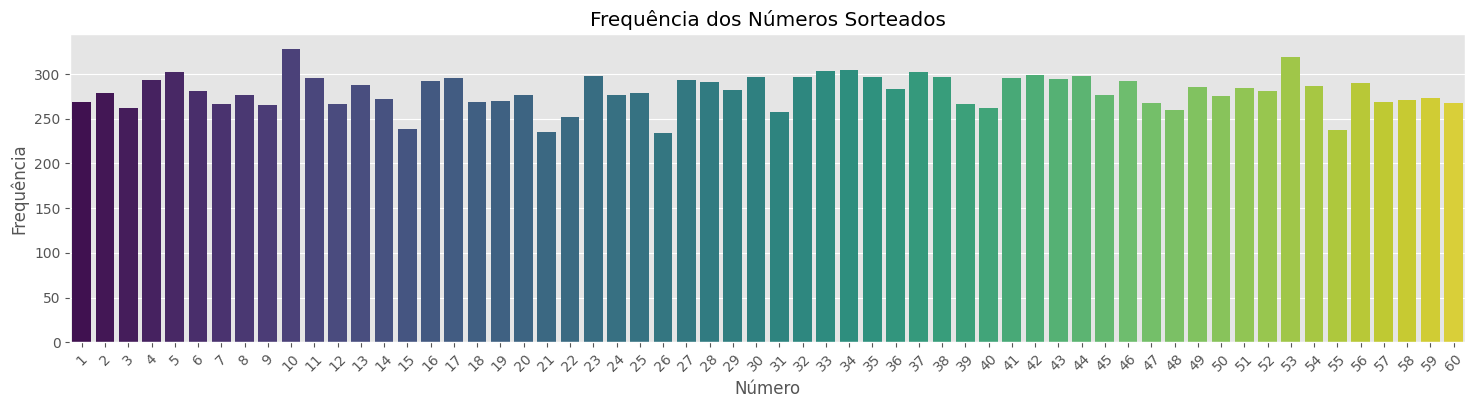

In [12]:
# 1. Analisando a distribuição dos números sorteados
plt.figure(figsize=(18, 4))
sns.barplot(x=freq_df['Número'], y=freq_df['Frequência'], palette='viridis')
plt.title('Frequência dos Números Sorteados')
plt.xlabel('Número')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

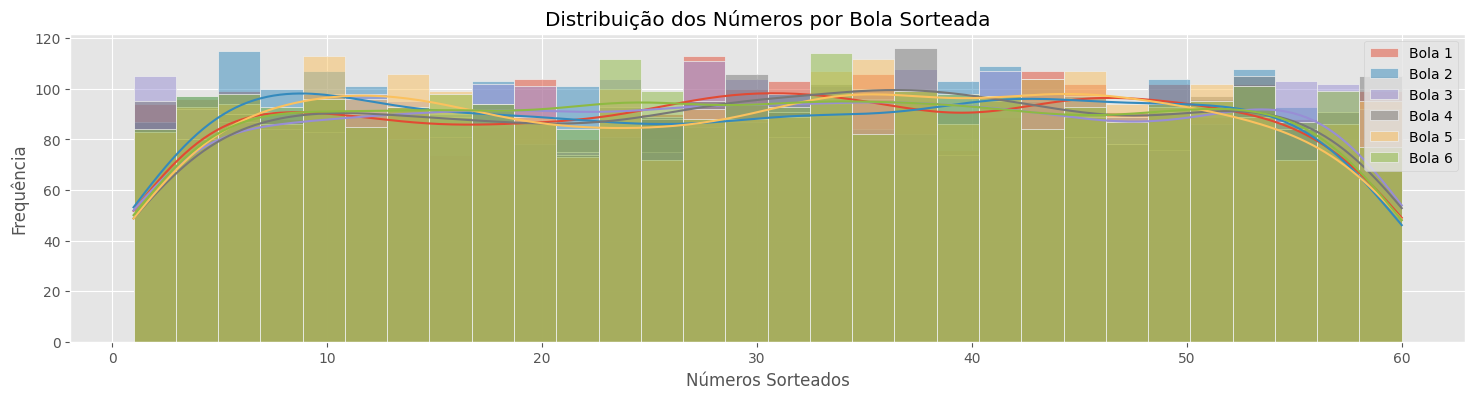

In [13]:
# 2. Analisando a distribuição dos números em cada bola sorteada
plt.figure(figsize=(18, 4))
for i in range(1, 7):
    sns.histplot(df[f'bola {i}'], kde=True, label=f'Bola {i}', bins=30)
plt.title('Distribuição dos Números por Bola Sorteada')
plt.xlabel('Números Sorteados')
plt.ylabel('Frequência')
plt.legend()
plt.show()

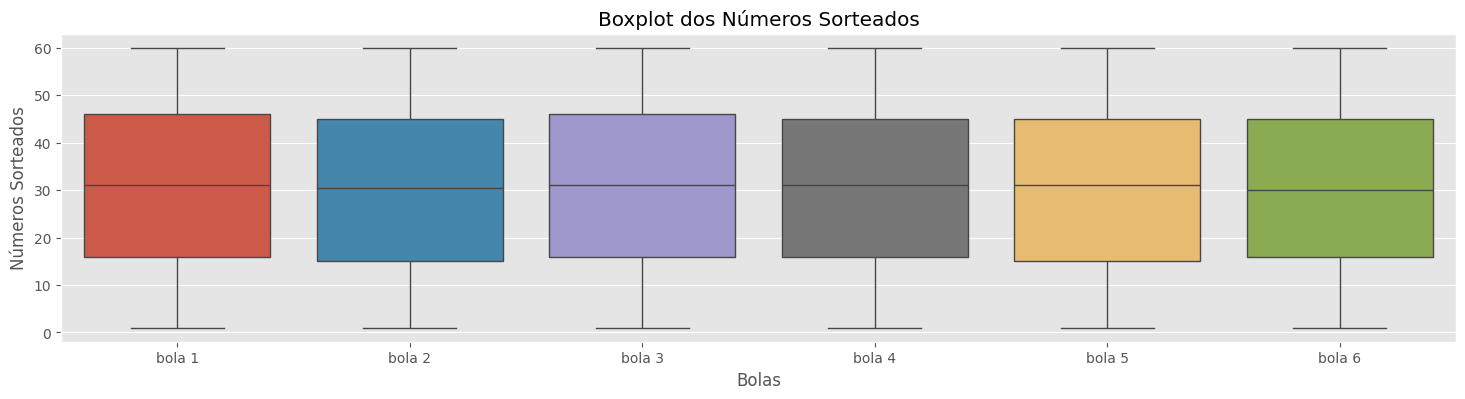

In [14]:
# 3. Identificando possíveis outliers na distribuição dos números
plt.figure(figsize=(18, 4))
sns.boxplot(data=df[[f'bola {i}' for i in range(1, 7)]])
plt.title('Boxplot dos Números Sorteados')
plt.xlabel('Bolas')
plt.ylabel('Números Sorteados')
plt.show()

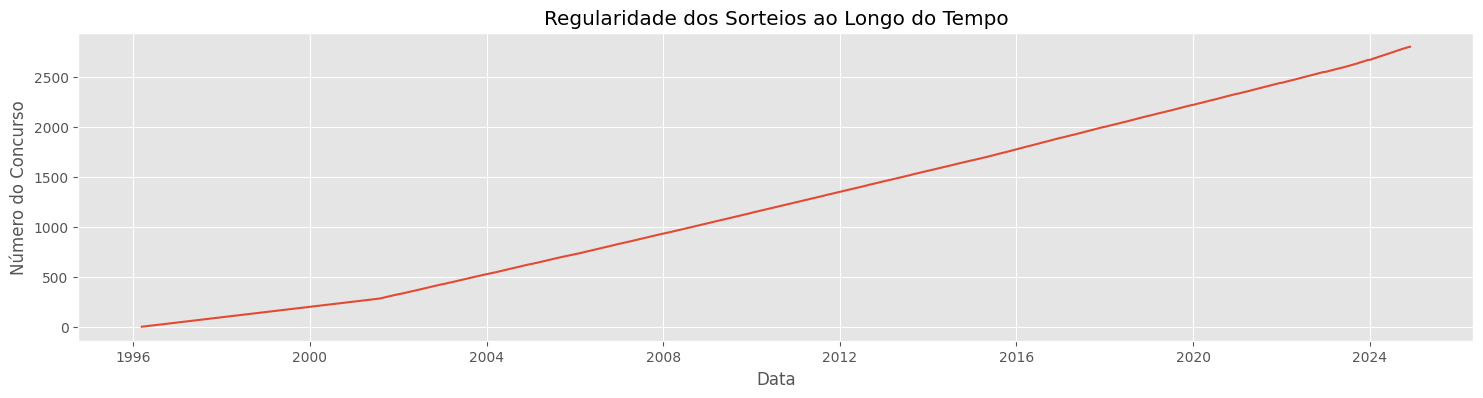

In [15]:
# 4. Analisando a regularidade dos sorteios ao longo do tempo
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

plt.figure(figsize=(18, 4))
sns.lineplot(x=df['Data'], y=df['Concurso'])
plt.title('Regularidade dos Sorteios ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número do Concurso')
plt.show()

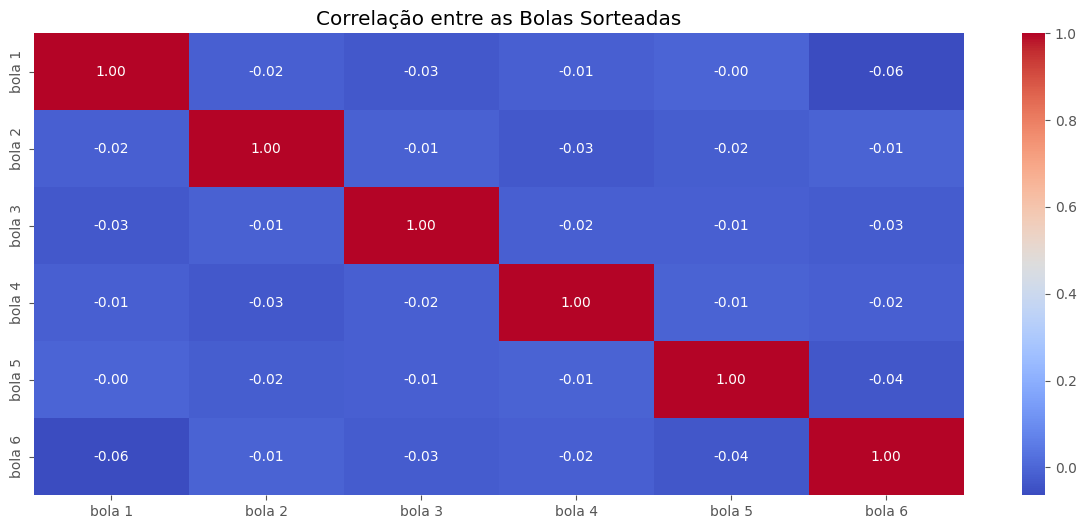

In [16]:
# 5. Correlação entre as bolas sorteadas
correlation_matrix = df[[f'bola {i}' for i in range(1, 7)]].corr()

plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre as Bolas Sorteadas')
plt.show()

## Planejamento do Modelo
    1 Feature Engineering:
        * Usar os números das bolas como características.
        * Criar um conjunto de dados para prever os próximos sorteios.

    2 Modelagem:
        * Aplicar RandomForestClassifier.
        * Dividir os dados em treinamento e teste.

    3 Streamlit:
        * Criar uma interface para gerar 12 previsões futuras.

* Agora, vou preparar os dados para o modelo, transformando os sorteios em uma sequência adequada para aprendizado temporal.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [18]:
features = df[['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']].dropna().values

In [19]:
X = features[:-1]
y = features[1:]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2240, 6), (2240, 6), (561, 6), (561, 6))

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Previsão
* Utilizando o modelo treinado para prever os próximos 10 sorteios com base nos últimos 100 sorteios.

In [23]:
last_draw = features[-1].reshape(1, -1)
predictions = []
num_sorteio = int(df['Concurso'].max()) + 1

In [24]:
for i in range(12):
    next_draw = model.predict(last_draw)
    sorted_draw = np.sort(next_draw.flatten())  # Ordenar os valores das bolas
    predictions.append({'Sorteio': num_sorteio, 
                        'bola 1': sorted_draw[0],
                        'bola 2': sorted_draw[1],
                        'bola 3': sorted_draw[2],
                        'bola 4': sorted_draw[3],
                        'bola 5': sorted_draw[4],
                        'bola 6': sorted_draw[5]})
    last_draw = next_draw
    num_sorteio += 1

In [25]:
forecast_df = pd.DataFrame(predictions)

In [28]:
from sklearn.metrics import accuracy_score

# Calcular a média de números corretos por sorteio
correct_per_draw = [
    len(set(real).intersection(set(predicted)))
    for real, predicted in zip(y_test, y_train)
]
average_correct = np.mean(correct_per_draw)

print(f"Média de números corretos por sorteio: {average_correct:.2f}")

Média de números corretos por sorteio: 0.58


In [29]:
# Mostrar a tabela com os sorteios forecastados
tools.display_dataframe_to_user(name="Forecast de Resultados da Mega Sena", dataframe=forecast_df)

Forecast de Resultados da Mega Sena


## Salvando o Modelo final!

In [30]:
import joblib

In [31]:
# Salvar o modelo em um arquivo
model_filename = 'model/mega_sena_model.pkl'
joblib.dump(model, model_filename)

print(f"Modelo salvo em: {model_filename}")

Modelo salvo em: model/mega_sena_model.pkl
